In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv("C:\\Users\\Msunwa\\Documents\\Projects\\2\\Stores.csv")

# Preprocessing

In [189]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

#  Univariate Plots

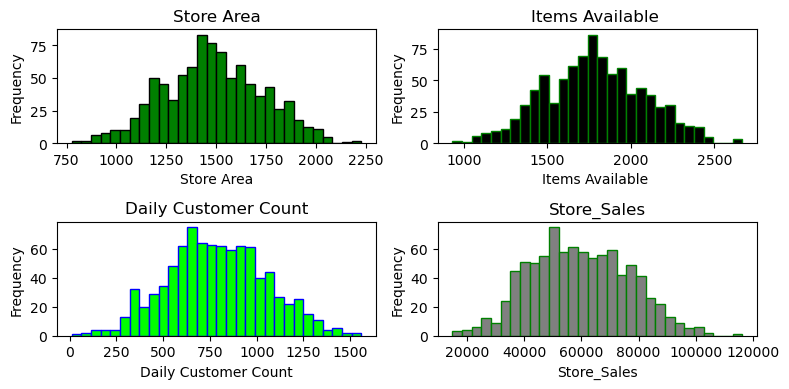

In [190]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(2,2,1)
plt.hist(df['Store_Area'], bins=30, color='green', edgecolor='black')
plt.xlabel('Store Area')
plt.ylabel('Frequency')
plt.title('Store Area')

ax2 = fig.add_subplot(2,2,2)
plt.hist(df['Items_Available'], bins=30, color='black', edgecolor='green')
plt.xlabel('Items Available ')
plt.ylabel('Frequency')
plt.title('Items Available ')

ax3 = fig.add_subplot(2,2,3)
plt.hist(df['Daily_Customer_Count'], bins=30, color='lime', edgecolor='blue')
plt.xlabel('Daily Customer Count')
plt.ylabel('Frequency')
plt.title('Daily Customer Count')

ax4 = fig.add_subplot(2,2,4)
plt.hist(df['Store_Sales'], bins=30, color='grey', edgecolor='green')
plt.xlabel('Store_Sales')
plt.ylabel('Frequency')
plt.title('Store_Sales')

plt.tight_layout()
plt.show()

# Quick overview on the Univariate Plots
-Store Area and Items Available are evenly  distributed across the dataset.                                                                              
-Store sales are a bit right skqweed whereas Daily customer count us left skweed.

In [204]:
df['Sales_Per_Customer'] = df['Daily_Customer_Count']/df['Store_Sales']

In [195]:
df['Traffic_per_sqm'] = df['Daily_Customer_Count']/df['Store_Area']

#  Bivairate Plots

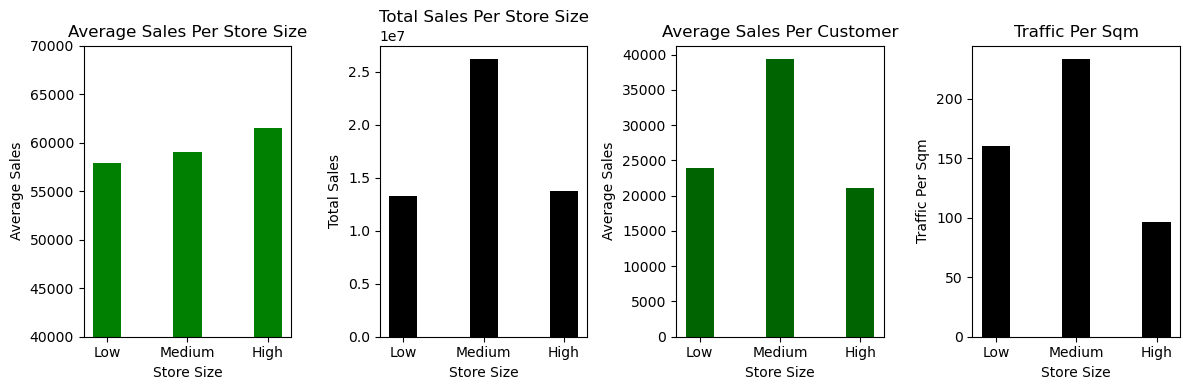

In [197]:
Area_bins = [740, 1320, 1654, 2230]  
Area_labels = ['Low', 'Medium', 'High']
df['Store_Area_C'] = pd.cut(df['Store_Area'], bins=Area_bins, labels=Area_labels, right=False)

# Creating a figure and subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4))

# Grouping by 'Store_Area_C' and calculating mean for subplot 1
mean_sales = df.groupby('Store_Area_C',observed=False)['Store_Sales'].mean()
ax1.bar(mean_sales.index, mean_sales, width=0.35, color='green')
ax1.set_ylim(40000, 70000)
ax1.set_xlabel('Store Size')
ax1.set_ylabel('Average Sales')
ax1.set_title('Average Sales Per Store Size')

# Grouping by 'Store_Area_C' and calculating sum for subplot 2
total_sales = df.groupby('Store_Area_C',observed=False)['Store_Sales'].sum()
ax2.bar(total_sales.index, total_sales, width=0.35, color='black')
ax2.set_xlabel('Store Size')
ax2.set_ylabel('Total Sales')
ax2.set_title('Total Sales Per Store Size')

# Grouping by 'Store_Area_C' and calculating sum for subplot 3
N_sales = df.groupby('Store_Area_C',observed=False)['Sales_Per_Customer'].sum()
ax3.bar(N_sales.index, N_sales, width=0.35, color='darkgreen')
ax3.set_xlabel('Store Size')
ax3.set_ylabel('Average Sales')
ax3.set_title('Average Sales Per Customer')

# Grouping by 'Store_Area_C' and calculating sum for subplot 4
Traffic_Per_sqmr = df.groupby('Store_Area_C',observed=False)['Traffic_per_sqm'].sum()
ax4.bar(Traffic_Per_sqmr.index, Traffic_Per_sqmr, width=0.35, color= 'black')
ax4.set_xlabel('Store Size')
ax4.set_ylabel('Traffic Per Sqm')
ax4.set_title('Traffic Per Sqm')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()

# Overview on Bivariate Plots

-Average sales are directly propertional to store size, however there are more total sales in medium sized store than there are in any other store.      On average medium sized stores see a high number of customer sales, this can be due to there being more stores since they have lower average sales.

# Inspect For Outliers

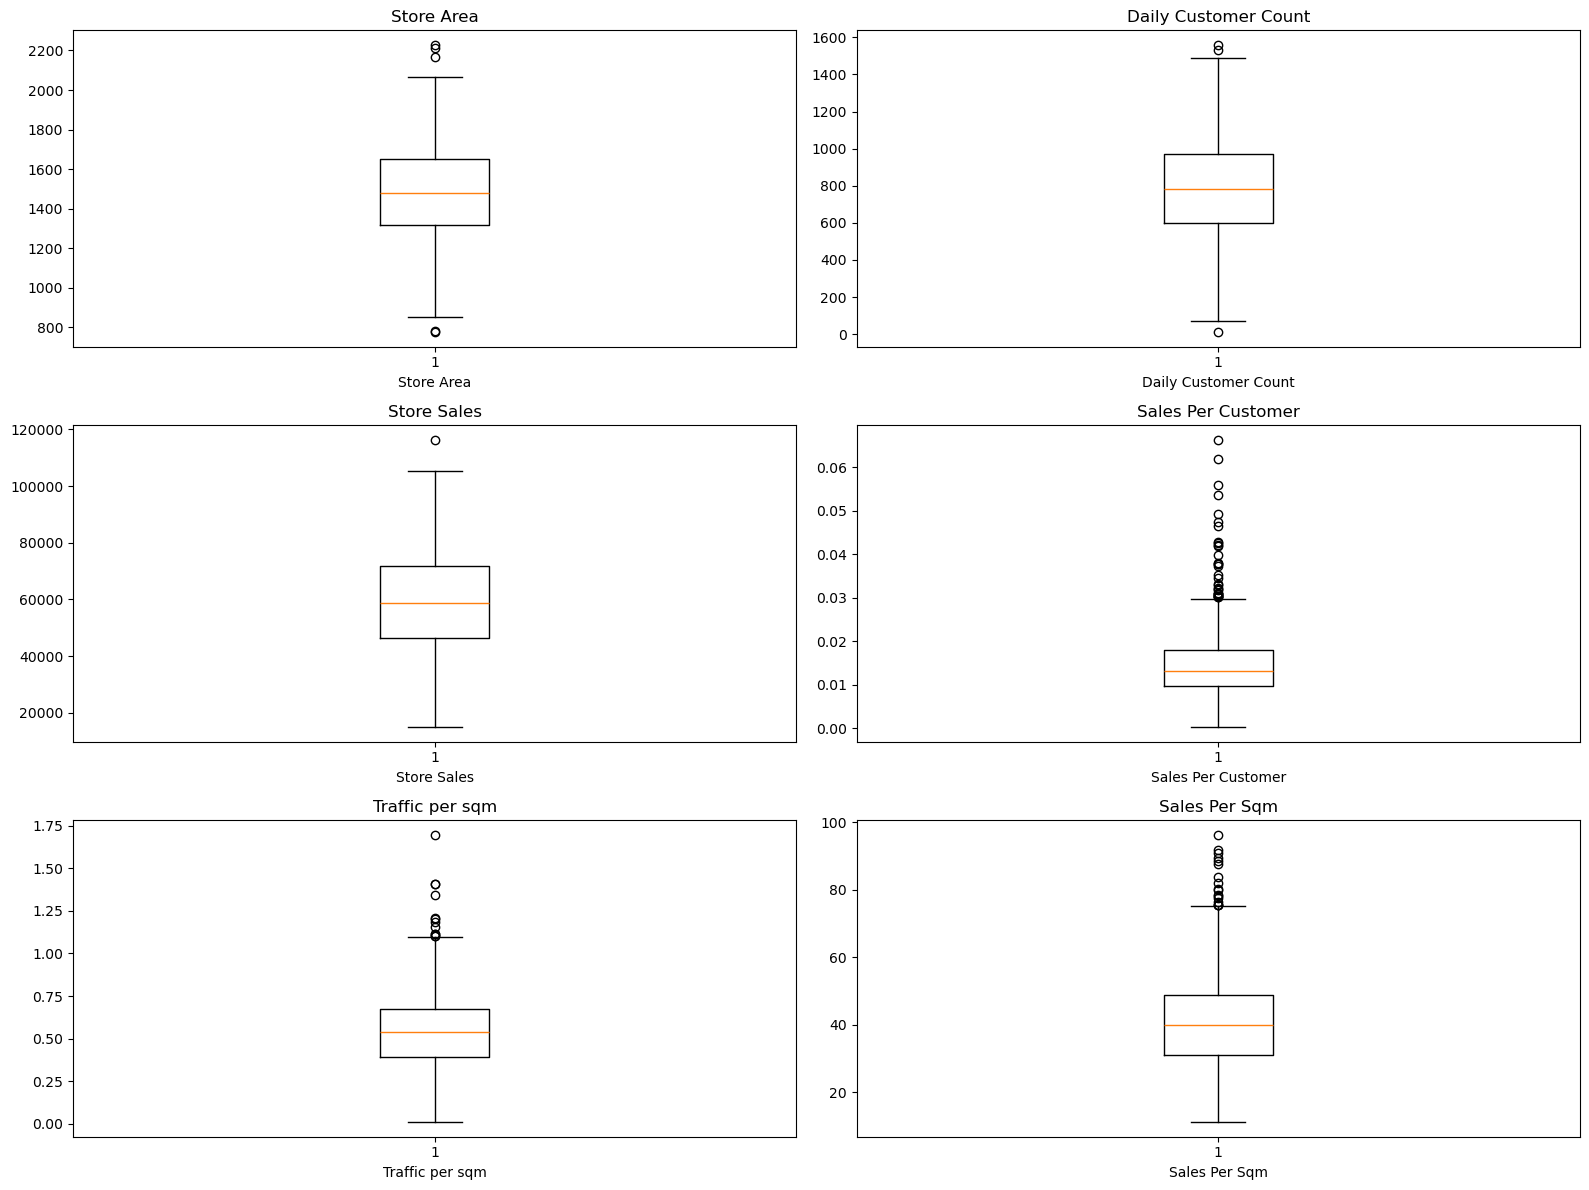

In [205]:
fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.boxplot(df['Store_Area'])
ax1.set_xlabel('Store Area')
ax1.set_title('Store Area')

ax2.boxplot(df['Daily_Customer_Count'])
ax2.set_xlabel('Daily Customer Count')
ax2.set_title('Daily Customer Count')

ax3.boxplot(df['Store_Sales'])
ax3.set_xlabel('Store Sales')
ax3.set_title('Store Sales')

ax4.boxplot(df['Sales_Per_Customer'])
ax4.set_xlabel('Sales Per Customer')
ax4.set_title('Sales Per Customer')


ax5.boxplot(df['Traffic_per_sqm'])
ax5.set_xlabel('Traffic per sqm')
ax5.set_title('Traffic per sqm')

ax6.boxplot(df['Sales_Per_Sqm'])
ax6.set_xlabel('Sales Per Sqm')
ax6.set_title('Sales Per Sqm')

plt.tight_layout()
plt.show()

# Outliers
The boxplot analysis reveals the notable presence of outliers across various metrics, prompting the need for adjustments and further descriptive statistics. For instance, in the case of traffic per square meter, any ratio surpassing 1 is deemed an outlier, indicating potential irregularities in foot traffic density. Similarly, outliers are identified in the sales per square ratio, particularly those exceeding 77, underscoring potential disparities in revenue generation relative to store size. However, no significant outliers are observed in store sales, suggesting relative stability in overall revenue figures. Conversely, sales per customer exhibit significant outliers beyond 0.03, hinting at discrepancies in individual purchasing behavior. Additionally, store area analysis identifies outliers beyond 2100 square meters, necessitating closer scrutiny of spatial dynamics. Lastly, daily customer count reveals outliers surpassing 1500, indicative of potential anomalies in customer visitation patterns. These findings underscore the importance of outlier identification and subsequent adjustments to ensure accurate and insightful analysis of retail performance metrics.

## Traffic Per Square Meter

In [240]:
df['Traffic_Outliers']=df['Traffic_per_sqm'][df['Traffic_per_sqm']<1.0]

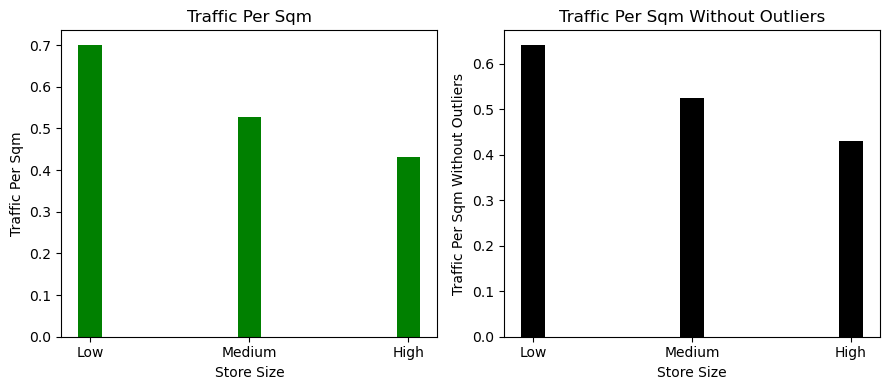

In [243]:
# Creating a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# Grouping by 'Store_Area_C' and calculating mean for subplot 1
Traffic_Per_sqmr = df.groupby('Store_Area_C',observed=False)['Traffic_per_sqm'].mean()
ax1.bar(Traffic_Per_sqmr.index, Traffic_Per_sqmr, width=0.15, color= 'green')
ax1.set_xlabel('Store Size')
ax1.set_ylabel('Traffic Per Sqm')
ax1.set_title('Traffic Per Sqm')
# Grouping by 'Store_Area_C' and calculating mean for subplot 2
Traffic_per_sqm_O = df.groupby('Store_Area_C',observed=False)['Traffic_Outliers'].mean()
ax2.bar(Traffic_per_sqm_O.index,Traffic_per_sqm_O, width=0.15, color='black')
ax2.set_xlabel('Store Size')
ax2.set_ylabel('Traffic Per Sqm Without Outliers')
ax2.set_title('Traffic Per Sqm Without Outliers')

plt.tight_layout()
plt.show()

## Sales per Square Meter

In [199]:
df['Sales_Per_Sqm'] = df['Store_Sales']/df['Store_Area']

In [236]:
# Removing Outliers
df['Sales_Per_Sqm_Without_Outliers']=df['Sales_Per_Sqm'][df['Sales_Per_Sqm']<77]

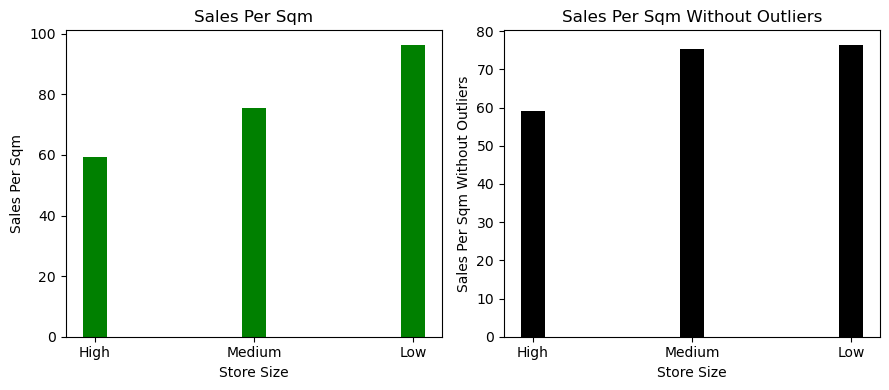

In [238]:
# Creating a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

#subplot 1
ax1.bar(df['Store_Area_C'],df['Sales_Per_Sqm'] , width=0.15, color='green')
ax1.set_xlabel('Store Size')
ax1.set_ylabel('Sales Per Sqm')
ax1.set_title('Sales Per Sqm')

#subplot 2
ax2.bar(df['Store_Area_C'], df['Sales_Per_Sqm_Without_Outliers'], width=0.15, color='black')
ax2.set_xlabel('Store Size')
ax2.set_ylabel('Sales Per Sqm Without Outliers')
ax2.set_title('Sales Per Sqm Without Outliers')

plt.tight_layout()
plt.show()

## Sales Per Customer

In [224]:
# Removing Outliers
df['Sales_per_customer_Outlier']=df['Sales_Per_Customer'][df['Sales_Per_Customer']< 0.03]

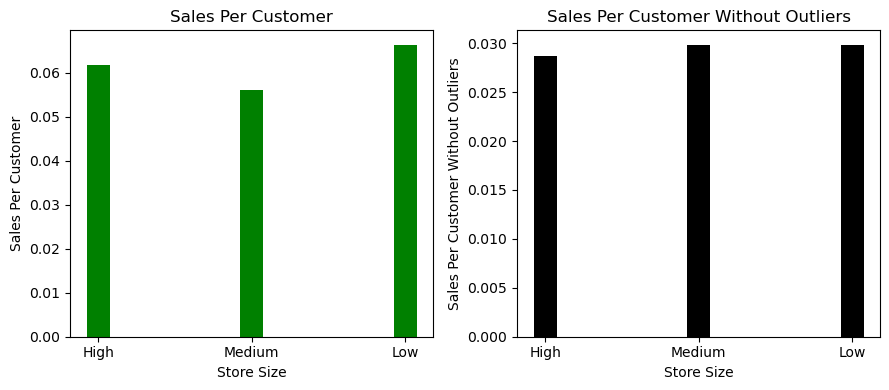

In [231]:
# Creating a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

#subplot 1
ax1.bar(df['Store_Area_C'],df['Sales_Per_Customer'] , width=0.15, color='green')
ax1.set_xlabel('Store Size')
ax1.set_ylabel('Sales Per Customer')
ax1.set_title('Sales Per Customer')

#subplot 2
ax2.bar(df['Store_Area_C'], df['Sales_per_customer_Outlier'], width=0.15, color='black')
ax2.set_xlabel('Store Size')
ax2.set_ylabel('Sales Per Customer Without Outliers')
ax2.set_title('Sales Per Customer Without Outliers')

plt.tight_layout()
plt.show()

## Daily Customer Count

In [215]:
#Removing Outliers
df['Daily_store_count_Outlier']=df['Daily_Customer_Count'][df['Daily_Customer_Count']<2100]

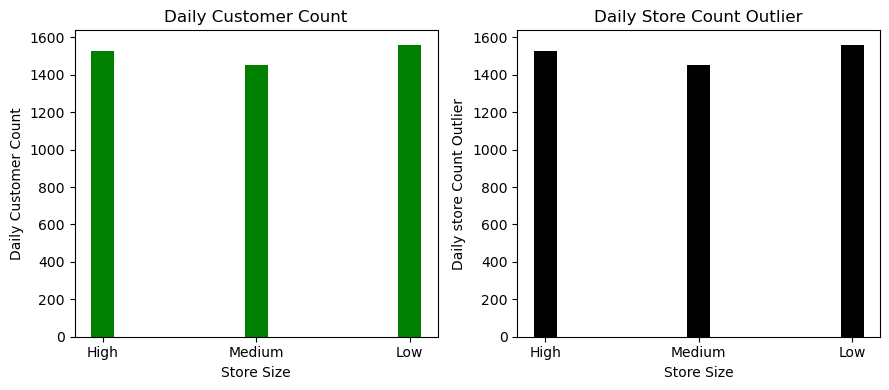

In [219]:
# Creating a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

#subplot 1
ax1.bar(df['Store_Area_C'],df['Daily_Customer_Count'] , width=0.15, color='green')
ax1.set_xlabel('Store Size')
ax1.set_ylabel('Daily Customer Count')
ax1.set_title('Daily Customer Count')

# Visualizing Daily Store customer count without outlier
ax2.bar(df['Store_Area_C'], df['Daily_store_count_Outlier'], width=0.15, color='black')
ax2.set_xlabel('Store Size')
ax2.set_ylabel('Daily store Count Outlier')
ax2.set_title('Daily Store Count Outlier')
plt.tight_layout()
plt.show()

# Conclusion

The data suggests that larger stores, as measured by their area, do not necessarily correlate with increased foot traffic. Surprisingly, despite their larger physical footprint, these stores exhibit traffic patterns similar to those of regular-sized stores. This observation challenges the conventional assumption that larger retail spaces naturally attract more customers. Such insight can have significant implications for strategic decision-making in the retail sector, prompting retailers to reconsider their approach to store size and layout optimization.

Furthermore, the analysis indicates that larger stores may not be more profitable on a per-customer basis compared to their smaller counterparts. Despite potentially higher overall sales volumes due to their larger size, the data reveals that sales per customer in these larger stores are comparable to or even lower than those in regular-sized stores. This suggests that while larger stores may generate greater revenue in absolute terms, they may not necessarily be more efficient or profitable on a per-customer basis. Retailers may need to evaluate the cost-effectiveness and efficiency of larger stores, considering factors beyond sheer size when planning expansions or new store openings.